In [1]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For statistical data visualization based on Matplotlib
from sklearn.ensemble import RandomForestClassifier  # For building a random forest classifier
from tabulate import tabulate  # For pretty-printing tabular data
import pickle # For storing and loading Python objects
from sklearn import metrics  # For model evaluation metrics
from sklearn.model_selection import train_test_split  # To split data into train and test sets
from sklearn.metrics import recall_score  # To calculate recall score for classification models
from sklearn.metrics import classification_report  # To generate classification performance report
from sklearn.metrics import confusion_matrix  # To create a confusion matrix for model evaluation
from sklearn.tree import DecisionTreeClassifier  # For building a Decision Tree classifier
from imblearn.combine import SMOTEENN  # For handling class imbalance using SMOTE and ENN

In [2]:
# Load dataset from CSV file
df = pd.read_csv(r"D:\Stuff\Data Science\Machine Learning Models\Customer_churn_model\WA_Fn-UseC_-Telco-Customer-Churn.csv")
# Display the first few rows of the dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Display the shape,total raws,data type of the columns in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- It is observed that `TotalCharges` is of type **object**, whereas it should be of type **float**.
- The `SeniorCitizen` column should ideally be of type **object** instead of **int64**, since it contains values `0` and `1`, which represent categories rather than numerical values. Changing the data type helps reduce confusion during calculations.
- All other column data types appear to be appropriate.

In [4]:
# Convert 'TotalCharges' column to numeric, coercing errors to NaN
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
# Convert 'SSeniorCitizen' column to categorical type
df.SeniorCitizen = df.SeniorCitizen.astype('category')
# Display the data types of each column again to confirm changes 
df.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [5]:
# Display the number of null values in each column
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
# Display the rows where 'TotalCharges' is null
df.loc[df['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [7]:
# Drop rows with null values in any column
df.dropna(how = 'any', inplace = True)

In [8]:
# Display the number of churned customers as "yes" and non-churned customers as "no"
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [9]:
# Display the value counts for the 'Churn' column excluding the numric and date columns
excluded_columns = ['customerID', 'TotalCharges','tenure','MonthlyCharges']
included_columns = [col for col in df.columns if col not in excluded_columns]

# Display the value counts for each column in the included columns
for col in included_columns:
    print(f"Values Count for {col}: ")
    print(f"{df[col].value_counts()}")
    print("\n")

Values Count for gender: 
gender
Male      3549
Female    3483
Name: count, dtype: int64


Values Count for SeniorCitizen: 
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64


Values Count for Partner: 
Partner
No     3639
Yes    3393
Name: count, dtype: int64


Values Count for Dependents: 
Dependents
No     4933
Yes    2099
Name: count, dtype: int64


Values Count for PhoneService: 
PhoneService
Yes    6352
No      680
Name: count, dtype: int64


Values Count for MultipleLines: 
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64


Values Count for InternetService: 
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


Values Count for OnlineSecurity: 
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64


Values Count for OnlineBackup: 
OnlineBackup
No                     3087
Yes           

In [10]:
# Display the percentage of churned and non-churned customers
churn_percentages = df['Churn'].value_counts(normalize=True) * 100
for value, percentage in churn_percentages.items():
    print(f"{value}: {percentage:.2f} %")

No: 73.42 %
Yes: 26.58 %


In [11]:
# Sagregate excluded_columns (numeric and date columns) and included_columns (categorical columns)
excluded_columns = ['customerID', 'TotalCharges','tenure','MonthlyCharges']
included_columns = [col for col in df.columns if col not in excluded_columns]

# Display the percentage of churned customers for each value in the included columns
for col in included_columns:
    print(f"{col}: ")
    churn_pct = df[col].value_counts(normalize=True) * 100
    for value,percentage in churn_pct.items():
        print (f"{value}: {percentage:.2f} %")
    print()

gender: 
Male: 50.47 %
Female: 49.53 %

SeniorCitizen: 
0: 83.76 %
1: 16.24 %

Partner: 
No: 51.75 %
Yes: 48.25 %

Dependents: 
No: 70.15 %
Yes: 29.85 %

PhoneService: 
Yes: 90.33 %
No: 9.67 %

MultipleLines: 
No: 48.14 %
Yes: 42.19 %
No phone service: 9.67 %

InternetService: 
Fiber optic: 44.03 %
DSL: 34.36 %
No: 21.62 %

OnlineSecurity: 
No: 49.73 %
Yes: 28.65 %
No internet service: 21.62 %

OnlineBackup: 
No: 43.90 %
Yes: 34.49 %
No internet service: 21.62 %

DeviceProtection: 
No: 44.00 %
Yes: 34.39 %
No internet service: 21.62 %

TechSupport: 
No: 49.37 %
Yes: 29.01 %
No internet service: 21.62 %

StreamingTV: 
No: 39.95 %
Yes: 38.44 %
No internet service: 21.62 %

StreamingMovies: 
No: 39.55 %
Yes: 38.84 %
No internet service: 21.62 %

Contract: 
Month-to-month: 55.11 %
Two year: 23.96 %
One year: 20.93 %

PaperlessBilling: 
Yes: 59.27 %
No: 40.73 %

PaymentMethod: 
Electronic check: 33.63 %
Mailed check: 22.81 %
Bank transfer (automatic): 21.93 %
Credit card (automatic): 21.63 

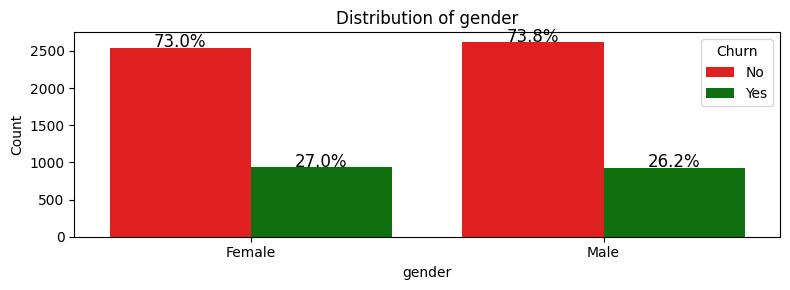

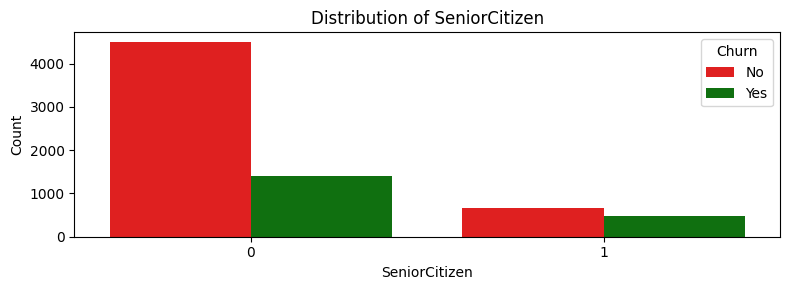

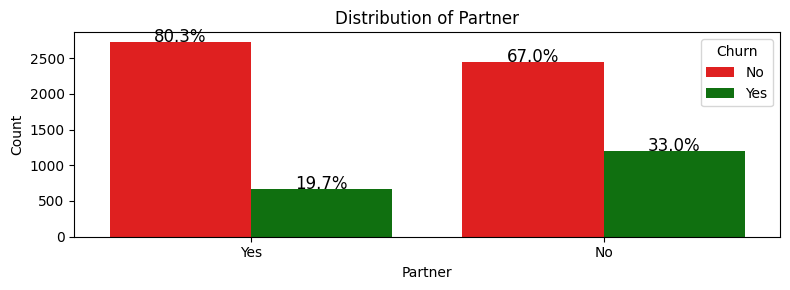

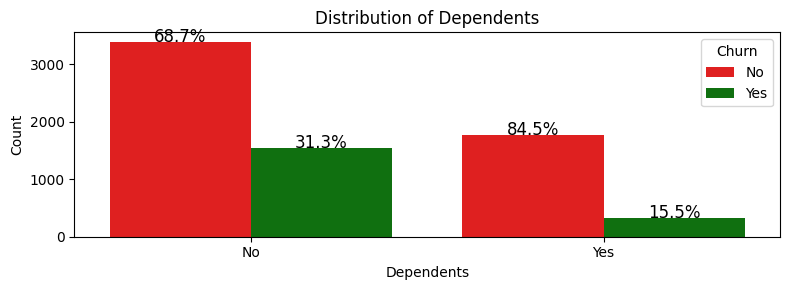

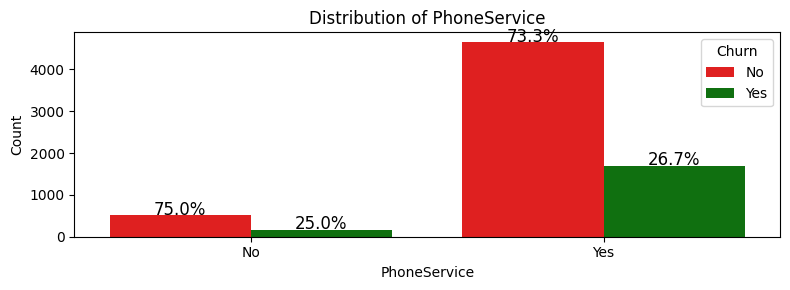

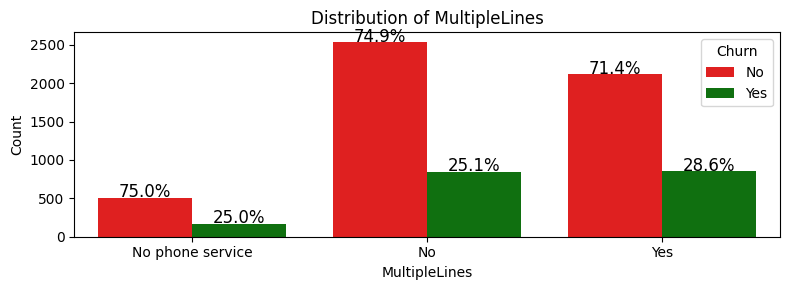

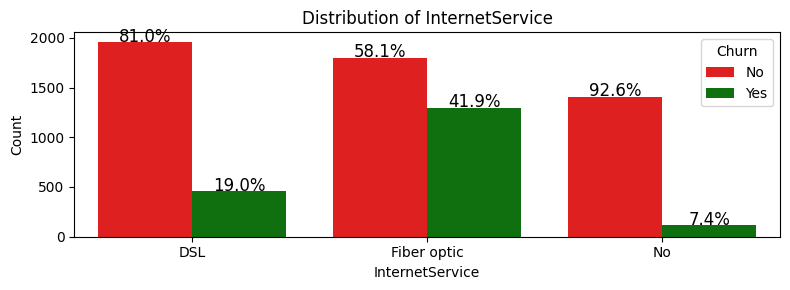

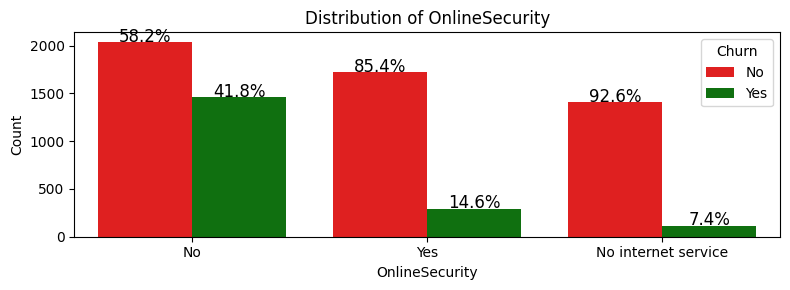

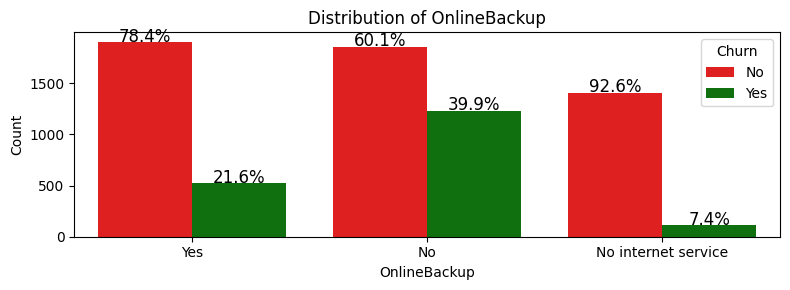

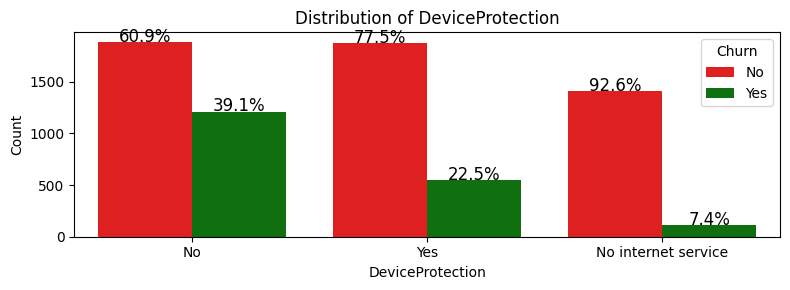

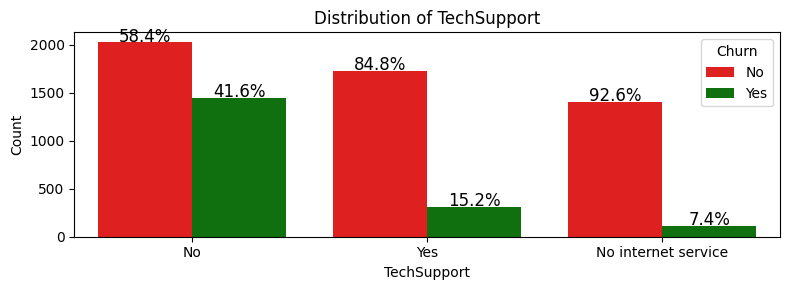

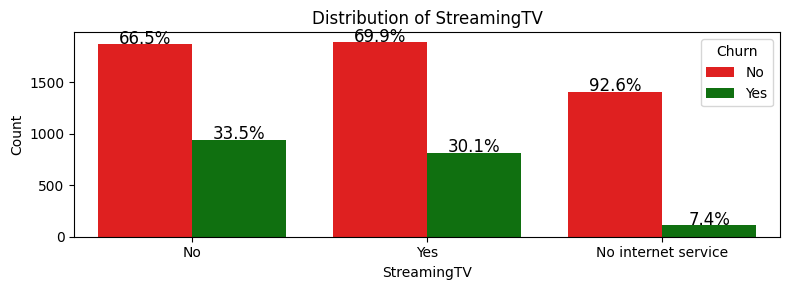

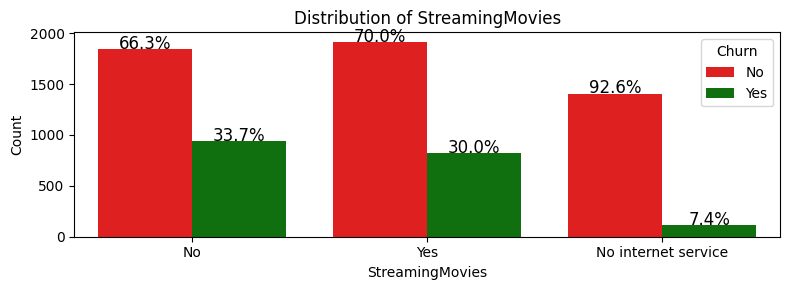

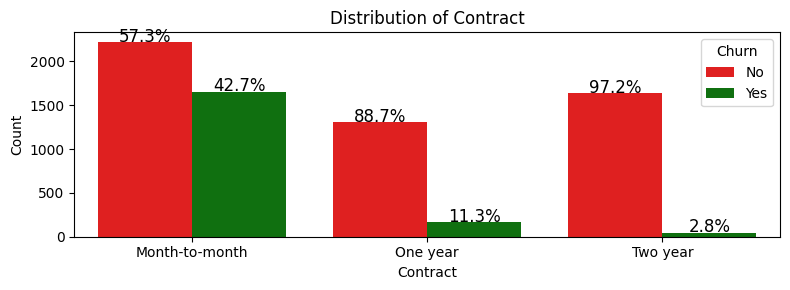

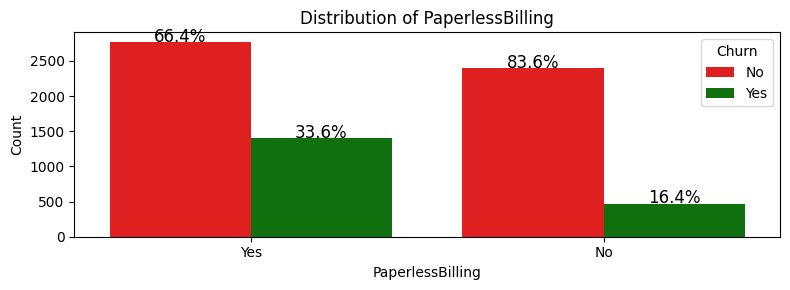

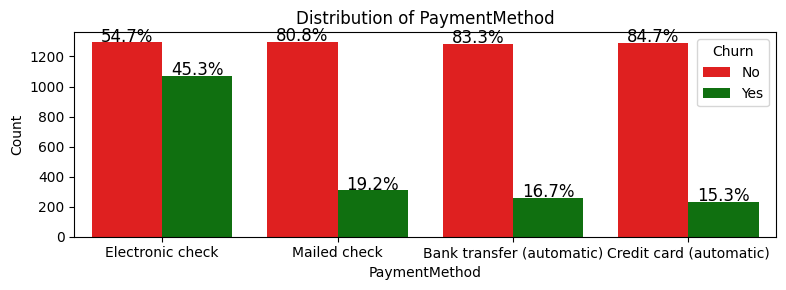

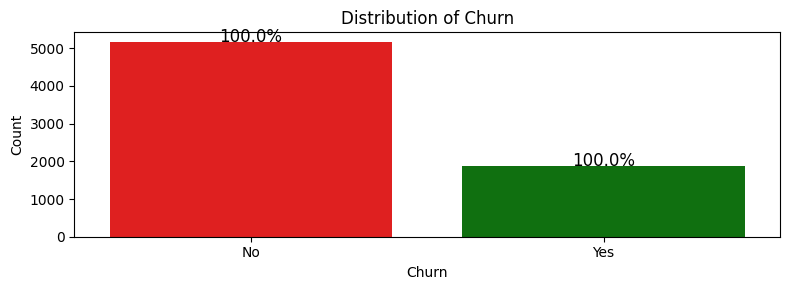

In [12]:
# Exclude continuous and irrelevant columns
excluded_columns = ['customerID', 'TotalCharges', 'tenure', 'MonthlyCharges']
included_columns = [col for col in df.columns if col not in excluded_columns]

# Colors for the Churn categories
colours = ['red', 'green']

for col in included_columns:
    plt.figure(figsize=(8, 3))
    ax = sns.countplot(data=df, x=col, hue='Churn', palette=colours)
    plt.title(f"Distribution of {col}")
    plt.ylabel('Count')
    plt.xlabel(col)

    # Add percentage labels
    for p in ax.patches:
        height = p.get_height()
        if height == 0:
            continue

        idx = list(ax.patches).index(p)
        x_val = p.get_x() + p.get_width() / 2
        i = idx % len(ax.get_xticklabels())

        try:
            category_name = ax.get_xticklabels()[i].get_text()
            category_count = df[df[col] == category_name].shape[0]

            if category_count > 0:
                percentage = (height / category_count) * 100
                ax.text(x_val, height + 5,
                        f'{percentage:.1f}%',
                        ha='center', fontsize=12)
        except:
            continue

    plt.tight_layout()
    plt.show()

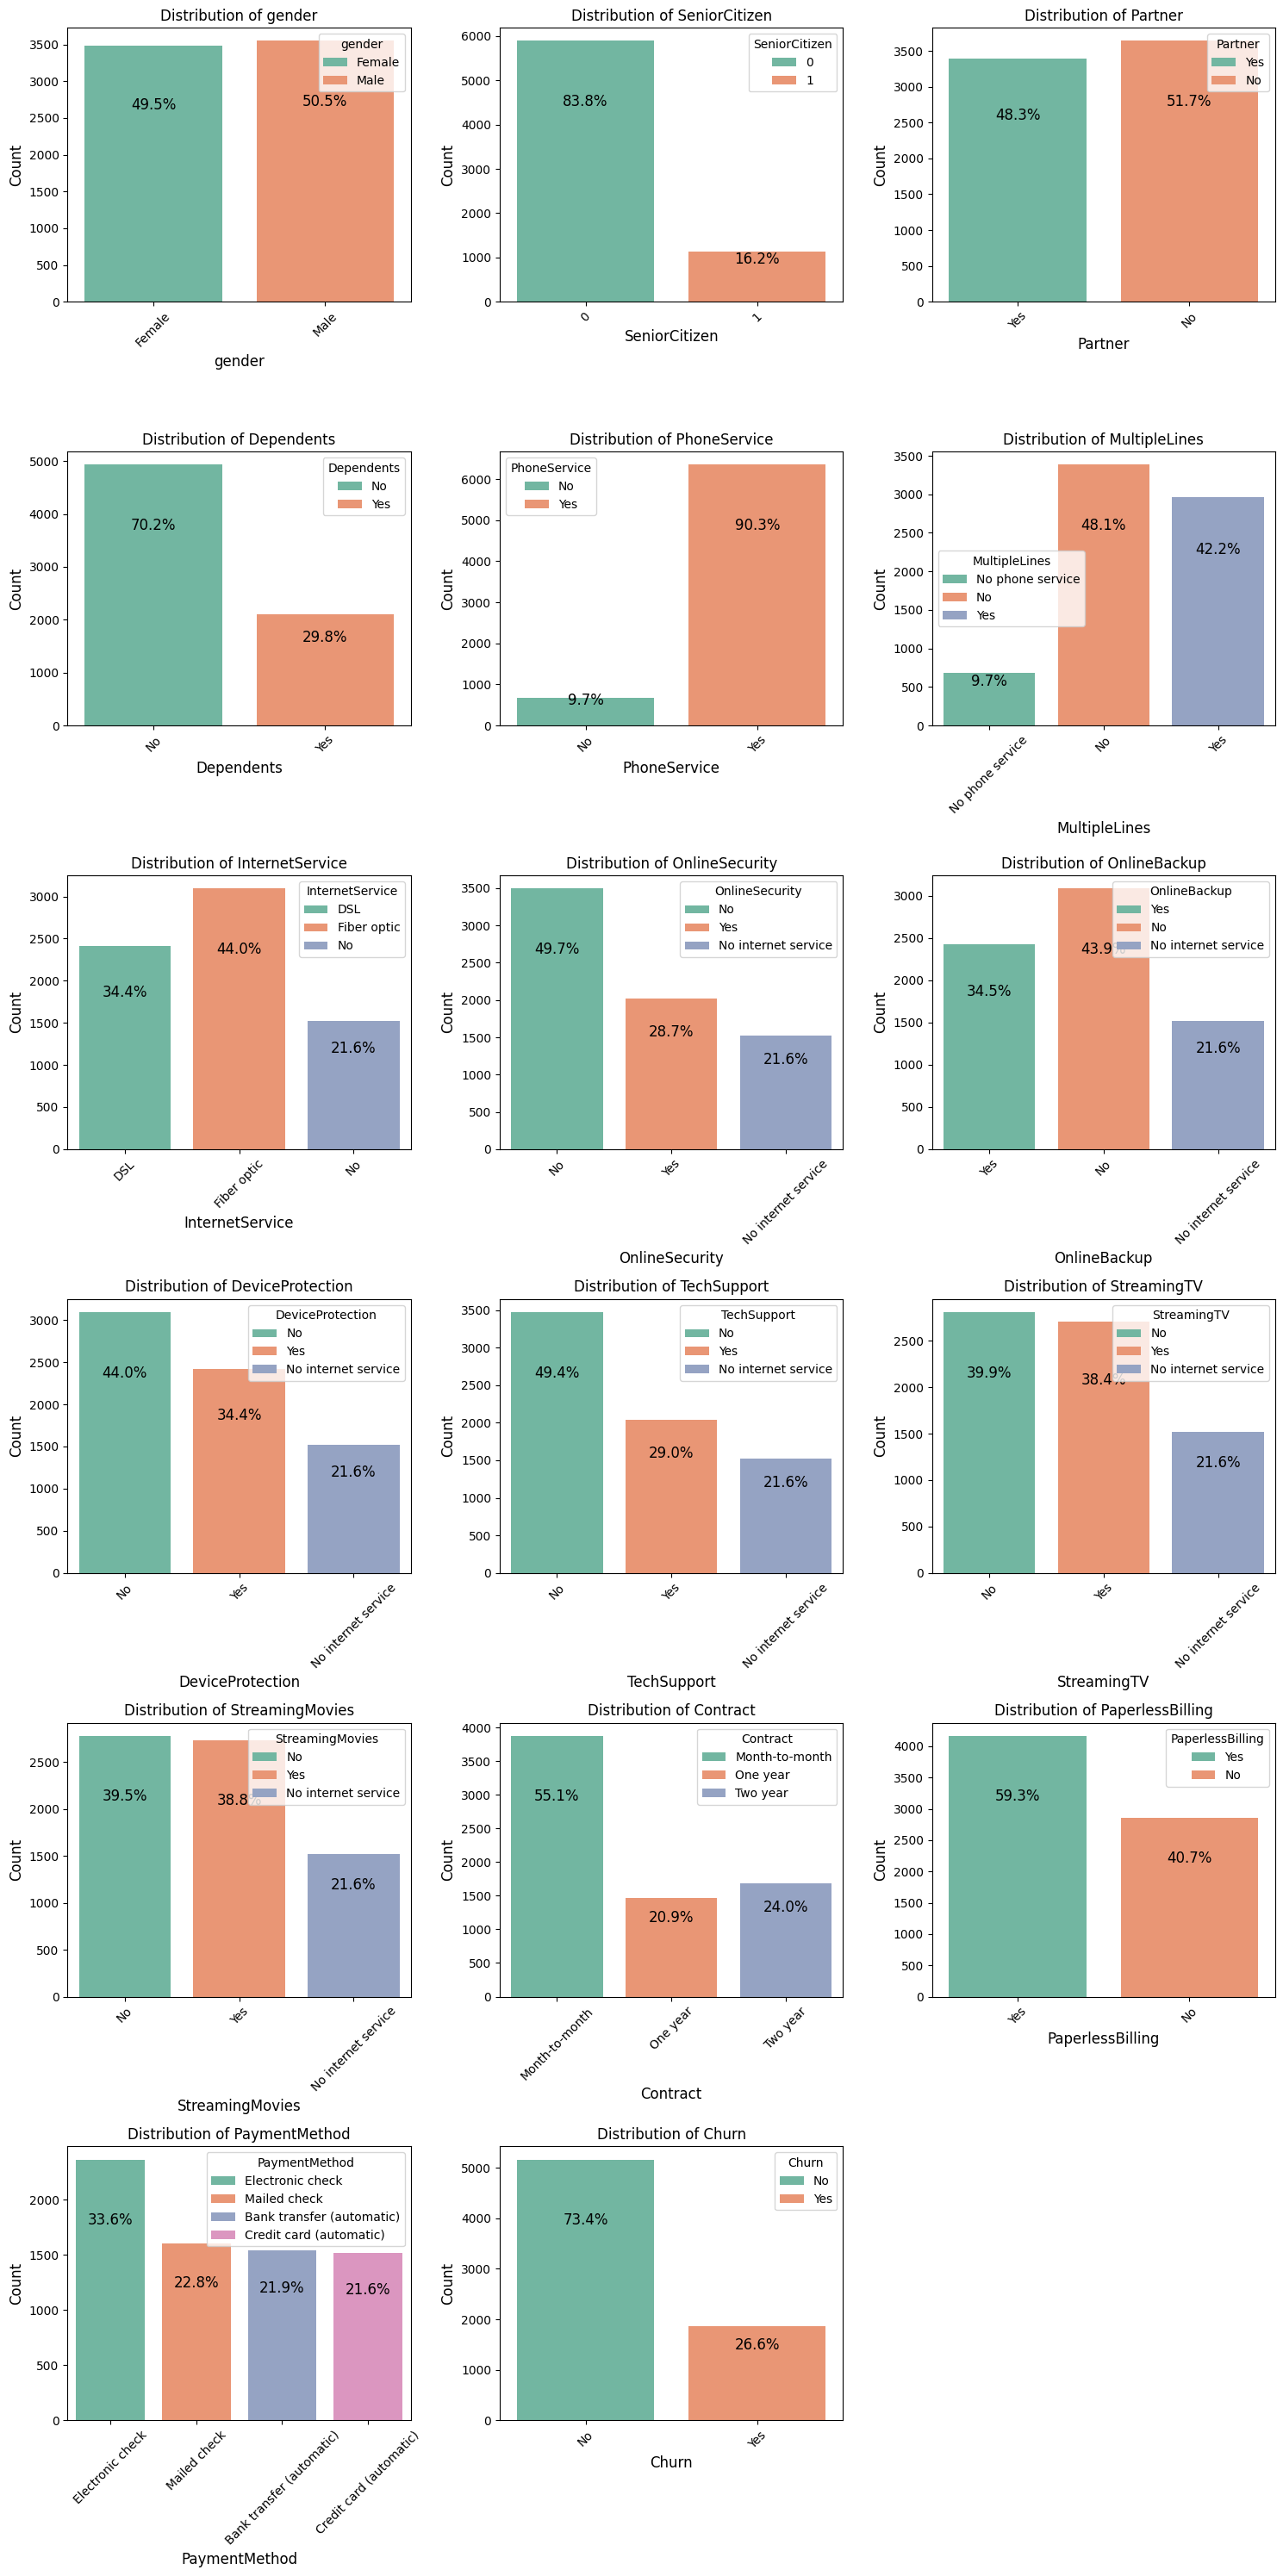

In [13]:
# 🔹 Exclude numeric and date columns from plotting
excluded_columns = ['customerID', 'TotalCharges', 'tenure', 'MonthlyCharges']
included_columns = [col for col in df.columns if col not in excluded_columns]

# 🔹 Set grid dimensions for subplots
n_cols = 3  # Number of columns in subplot grid
n_rows = (len(included_columns) // n_cols) + (len(included_columns) % n_cols > 0)

# 🔹 Initialize the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten 2D array to 1D for easy looping

# 🔹 Loop through each categorical column
for i, col in enumerate(included_columns):
    ax = axes[i]  # Select corresponding subplot axis

    # Create countplot for the current column
    sns.countplot(data=df, x=col, hue=col, ax=ax, palette='Set2', legend= True)

    # Add basic formatting
    ax.set_title(f"Distribution of {col}")
    ax.set_ylabel('Count', fontsize=12)
    ax.set_xlabel(col, fontsize=12)
    ax.tick_params(axis='x', rotation=45)

    # Add % labels to each bar based on total count for that column
    total = df[col].value_counts().sum()
    for p in ax.patches:
        height = p.get_height()
        if height == 0:
            continue
        percentage = (height / total) * 100
        ax.text(p.get_x() + p.get_width() / 2,
                height * 0.75,
                f'{percentage:.1f}%',
                ha="center", fontsize=12, color='black')

# 🔹 Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [14]:
# Display the number of churned customers total records
churn_data = df[df['Churn']=='Yes']
churn_data.shape

(1869, 21)

In [15]:
# Display Gender distribution count for churned customers
churn_data['gender'].value_counts()

gender
Female    939
Male      930
Name: count, dtype: int64

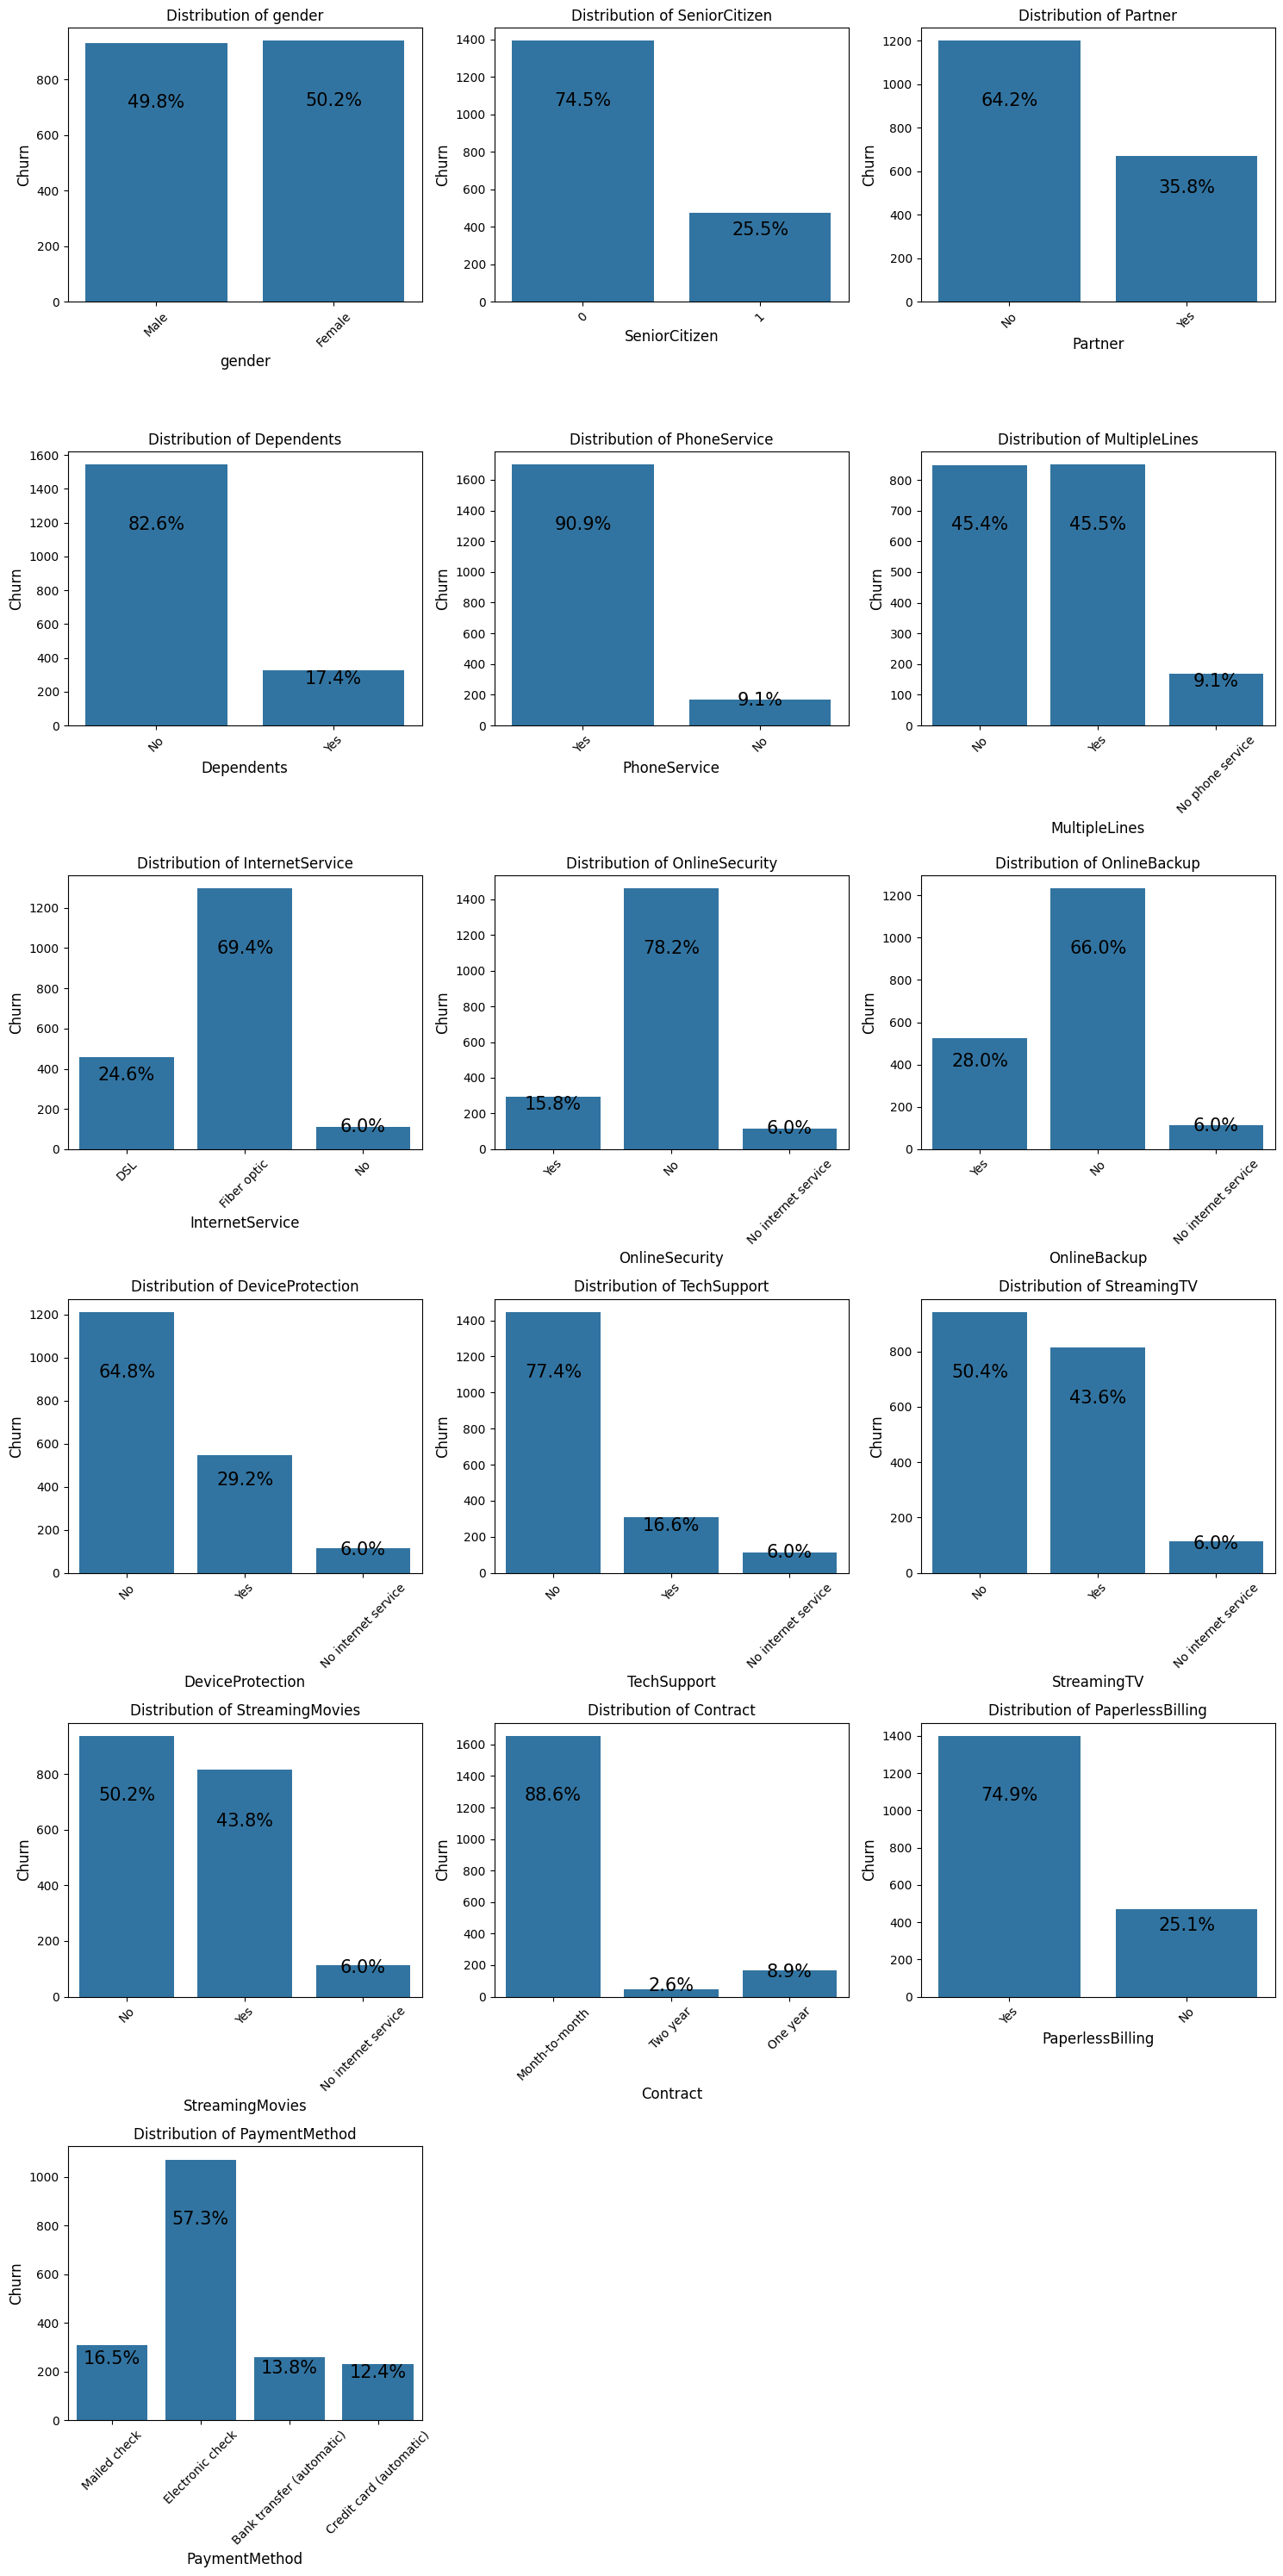

In [16]:
# Exclude numeric and date columns from plotting
excluded_churn_columns = ['customerID', 'TotalCharges', 'tenure', 'MonthlyCharges', 'Churn']
included_churn_columns = [col for col in churn_data.columns if col not in excluded_churn_columns]

# Number of rows and columns for the subplot grid (you can adjust these numbers)
n_cols = 3  # Adjust this to control the number of columns in the subplot grid
n_rows = (len(included_churn_columns) // n_cols) + (len(included_churn_columns) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() # Flatten to make indexing easier

# Loop over columns to plot
for i, col in enumerate(included_churn_columns):
    ax = axes[i]  # Get the corresponding axis for the current plot
    sns.countplot(data=churn_data, x=col, ax=ax)  # Plot on the specific subplot
    
    # Add title and labels
    ax.set_title(f"Distribution of {col}")
    ax.set_ylabel('Churn', fontsize=12)
    ax.set_xlabel(col, fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    
    # Show the percentage on top of each bar
    total = len(churn_data)
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        ax.text(p.get_x() + p.get_width() / 2, height-height/4, f'{percentage:.1f}%', 
                ha="center", fontsize=15, color='black')  # Positioning the text just above the bar

# Hide unused axes if there are fewer plots than subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

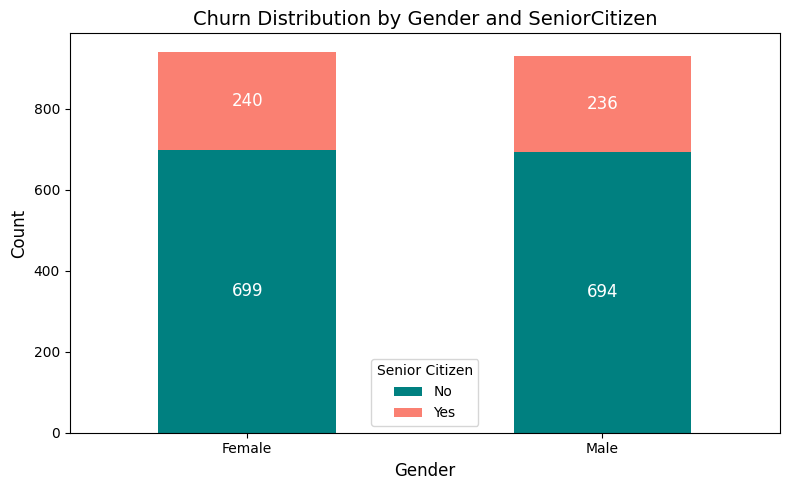

In [17]:
# Grouping data by Gender and SeniorCitizen
gender_senior_counts = churn_data.groupby(['gender', 'SeniorCitizen'], observed=False).size().unstack(fill_value=0)

# Plotting stacked bar chart 
ax = gender_senior_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5),
    color=['teal', 'salmon']  # color palette
)

# Annotate each segment with the count
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            p.get_y() + height / 2,
            f'{int(height)}',
            ha='center',
            va='center',
            fontsize=12,
            color='white'
        )

# Plot labels and title
ax.set_title('Churn Distribution by Gender and SeniorCitizen', fontsize=14)
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Gender', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(title='Senior Citizen', labels=['No', 'Yes'])

# Clean layout
plt.tight_layout()
plt.show()

In [18]:
# Get the maximum tenure value (in months) from the dataset
print(f"{int(df['tenure'].max())} month")

72 month


In [19]:
# Create a new DataFrame to avoid modifying the original
new_df = df.copy()

In [20]:
# Display the rows and columns of the new DataFrame
print(f"Total {new_df.shape[0]} rows")
print(f"Total {new_df.shape[1]} columns")

Total 7032 rows
Total 21 columns


In [21]:
# Define tenure group labels in 12-month intervals (e.g., '1 - 12', '13 - 24', ...)
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

# Categorize 'tenure' into discrete bins using the defined intervals
# right=False → interval includes the left value and excludes the right (e.g., [1,13) )
new_df['tenure_group'] = pd.cut(new_df.tenure, bins=range(1, 80, 12), right=False, labels=labels)

# Display the distribution of customers across tenure groups
new_df['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

##### Remove columns not required for processing

In [22]:
# Remove the 'tenure' and 'customerID' columns from the DataFrame 
new_df.drop(columns = ['customerID','tenure'], axis=1, inplace=True)
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


#### Data Exploration
##### **1. ** Plot distibution of individual predictors by churn

##### Univariate Analysis

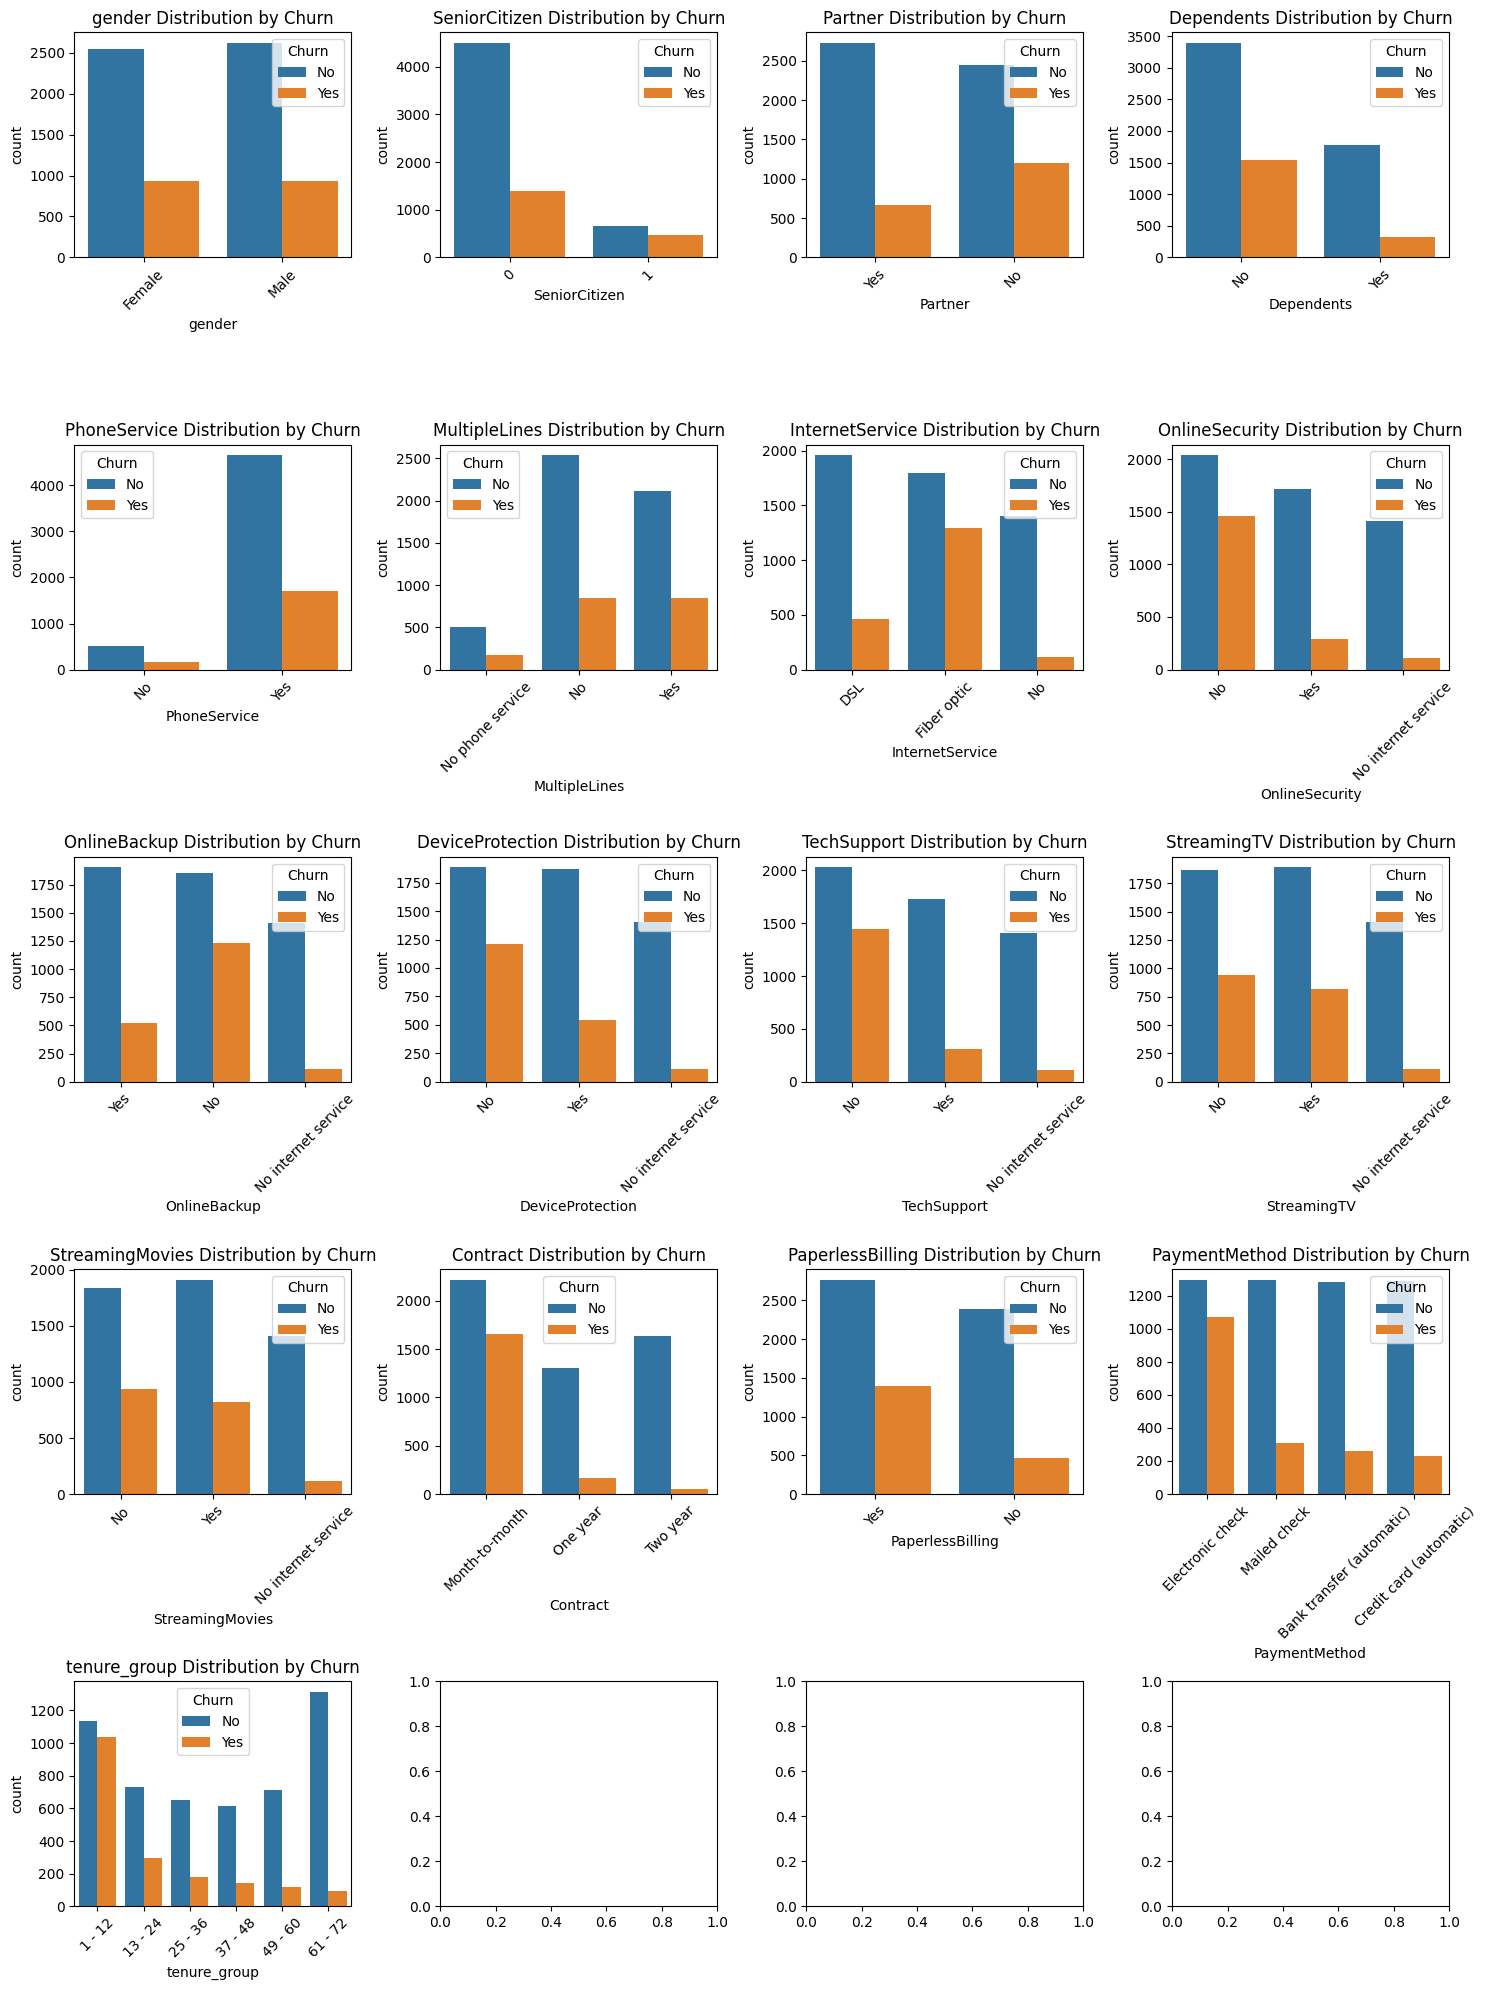

In [23]:
# Display the churn distribution across all categorical columns
fig, axes = plt.subplots(5,4, figsize=(15, 20))
axes = axes.flatten()
for i,col in enumerate(new_df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    ax = axes[i]
    sns.countplot(data= new_df, x= col, hue= 'Churn',ax=ax)
    ax.set_title(f'{col} Distribution by Churn')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Apply label encoding to churn column
new_df['Churn'] = np.where(new_df['Churn']=='Yes',1,0)
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [25]:
# Aplly label encoding to categorical columns
new_df_dummies = pd.get_dummies(new_df)
new_df_dummies = new_df_dummies.astype(int)
new_df_dummies.head()

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,29,29,0,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,56,1889,0,0,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,53,108,1,0,1,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,42,1840,0,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,70,151,1,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [26]:
# Display the null values in the new DataFrame
new_df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        0
dtype: int64

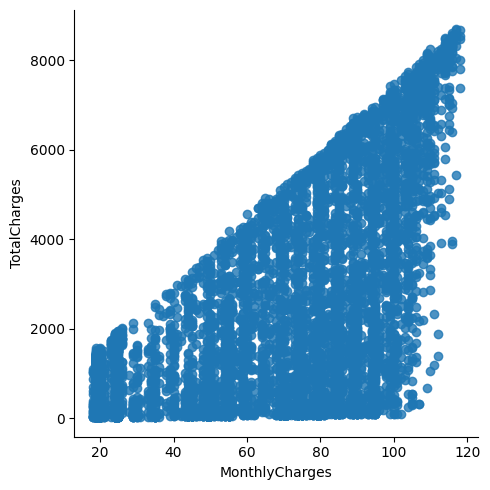

In [27]:
# Create a scatter plot of MonthlyCharges vs TotalCharges without fitting a regression line
# Helps visualize how customer spending on a monthly basis relates to their total expenditure
sns.lmplot(data=new_df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

#### Total Charges increase as Monthly Charges increase - as expected.

#### **10. ** Churn by Monthly Charges and Total Charges

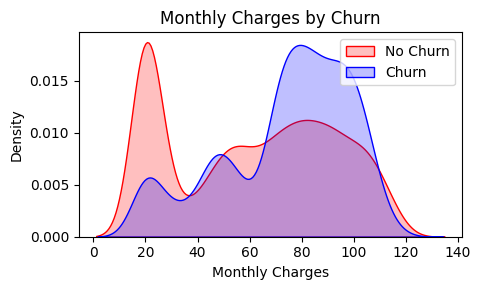

In [28]:
# Plot Kernel Density Estimation (KDE) curves for MonthlyCharges, separated by Churn status
# Helps visualize the distribution of MonthlyCharges for churned vs non-churned customers
plt.figure(figsize=(5,3))
mx = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"]==0)], color="Red", fill=True)
mx = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"]==1)], color="Blue", fill=True)
mx.legend(["No Churn", "Churn"], loc='upper right')
mx.set_ylabel('Density')
mx.set_xlabel('Monthly Charges')
mx.set_title('Monthly Charges by Churn')
plt.tight_layout()
plt.show()

##### Insight: Churn is high when Monthly Charges ar high

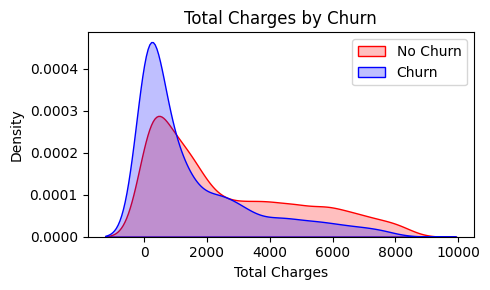

In [29]:
# Plot KDE curves to compare the distribution of TotalCharges for churned vs non-churned customers
# Helps understand how total spend differs between customers who stayed vs those who left
plt.figure(figsize=(5,3))
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"]==0)], color="Red", fill=True)
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"]==1)], color="Blue", fill=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total Charges by Churn')
plt.tight_layout()
plt.show()

- **Surprising Insight:** Higher churn is observed at lower Total Charges.

- However, when we combine the insights from all three parameters — **Tenure**, **Monthly Charges**, and **Total Charges** — the picture becomes clearer:
  - Higher Monthly Charges at lower Tenure result in lower Total Charges.
  - Hence, all three factors — **Higher Monthly Charges**, **Lower Tenure**, and **Lower Total Charges** — are linked to **high churn**.

---

### 11. Correlation of All Predictors with 'Churn'

<Axes: >

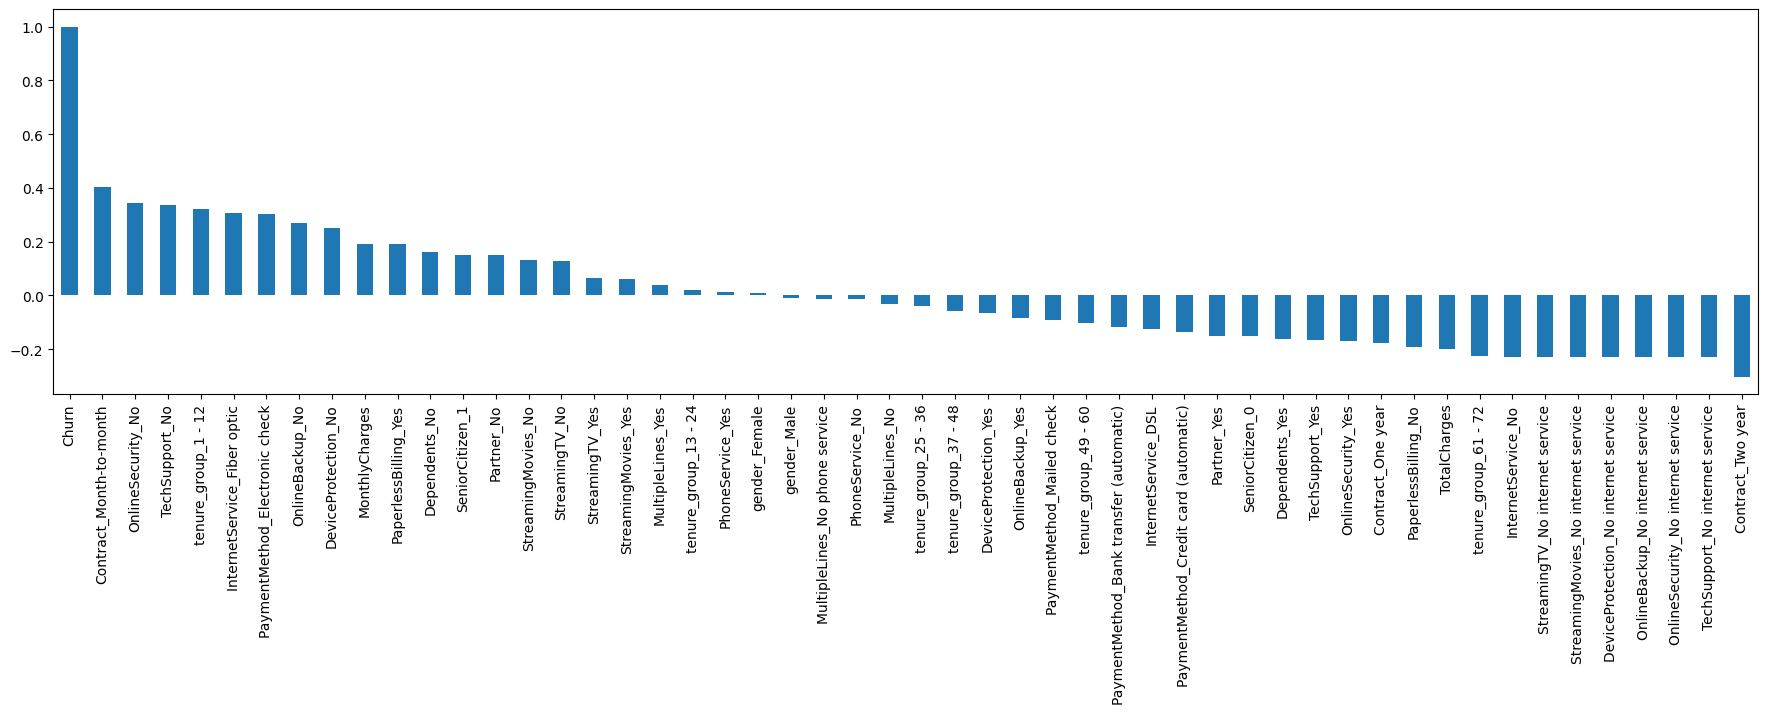

In [30]:
# Plotting correlation of all features with the target variable 'Churn'
# This helps identify which variables have the strongest positive or negative influence on churn.
plt.figure(figsize=(22,5))
new_df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight:**

- **High Churn** is observed in the case of:
    - Month-to-month contracts
    - No online security
    - No tech support
    - First year of subscription
    - Fibre optics internet

- **Low Churn** is seen in the case of:
    - Long-term contracts
    - Subscriptions without internet service
    - Customers engaged for 5+ years

- Factors like **Gender**, availability of **PhoneService**, and **# of multiple lines** have almost **no impact** on Churn.

This is also evident from the Heatmap below.

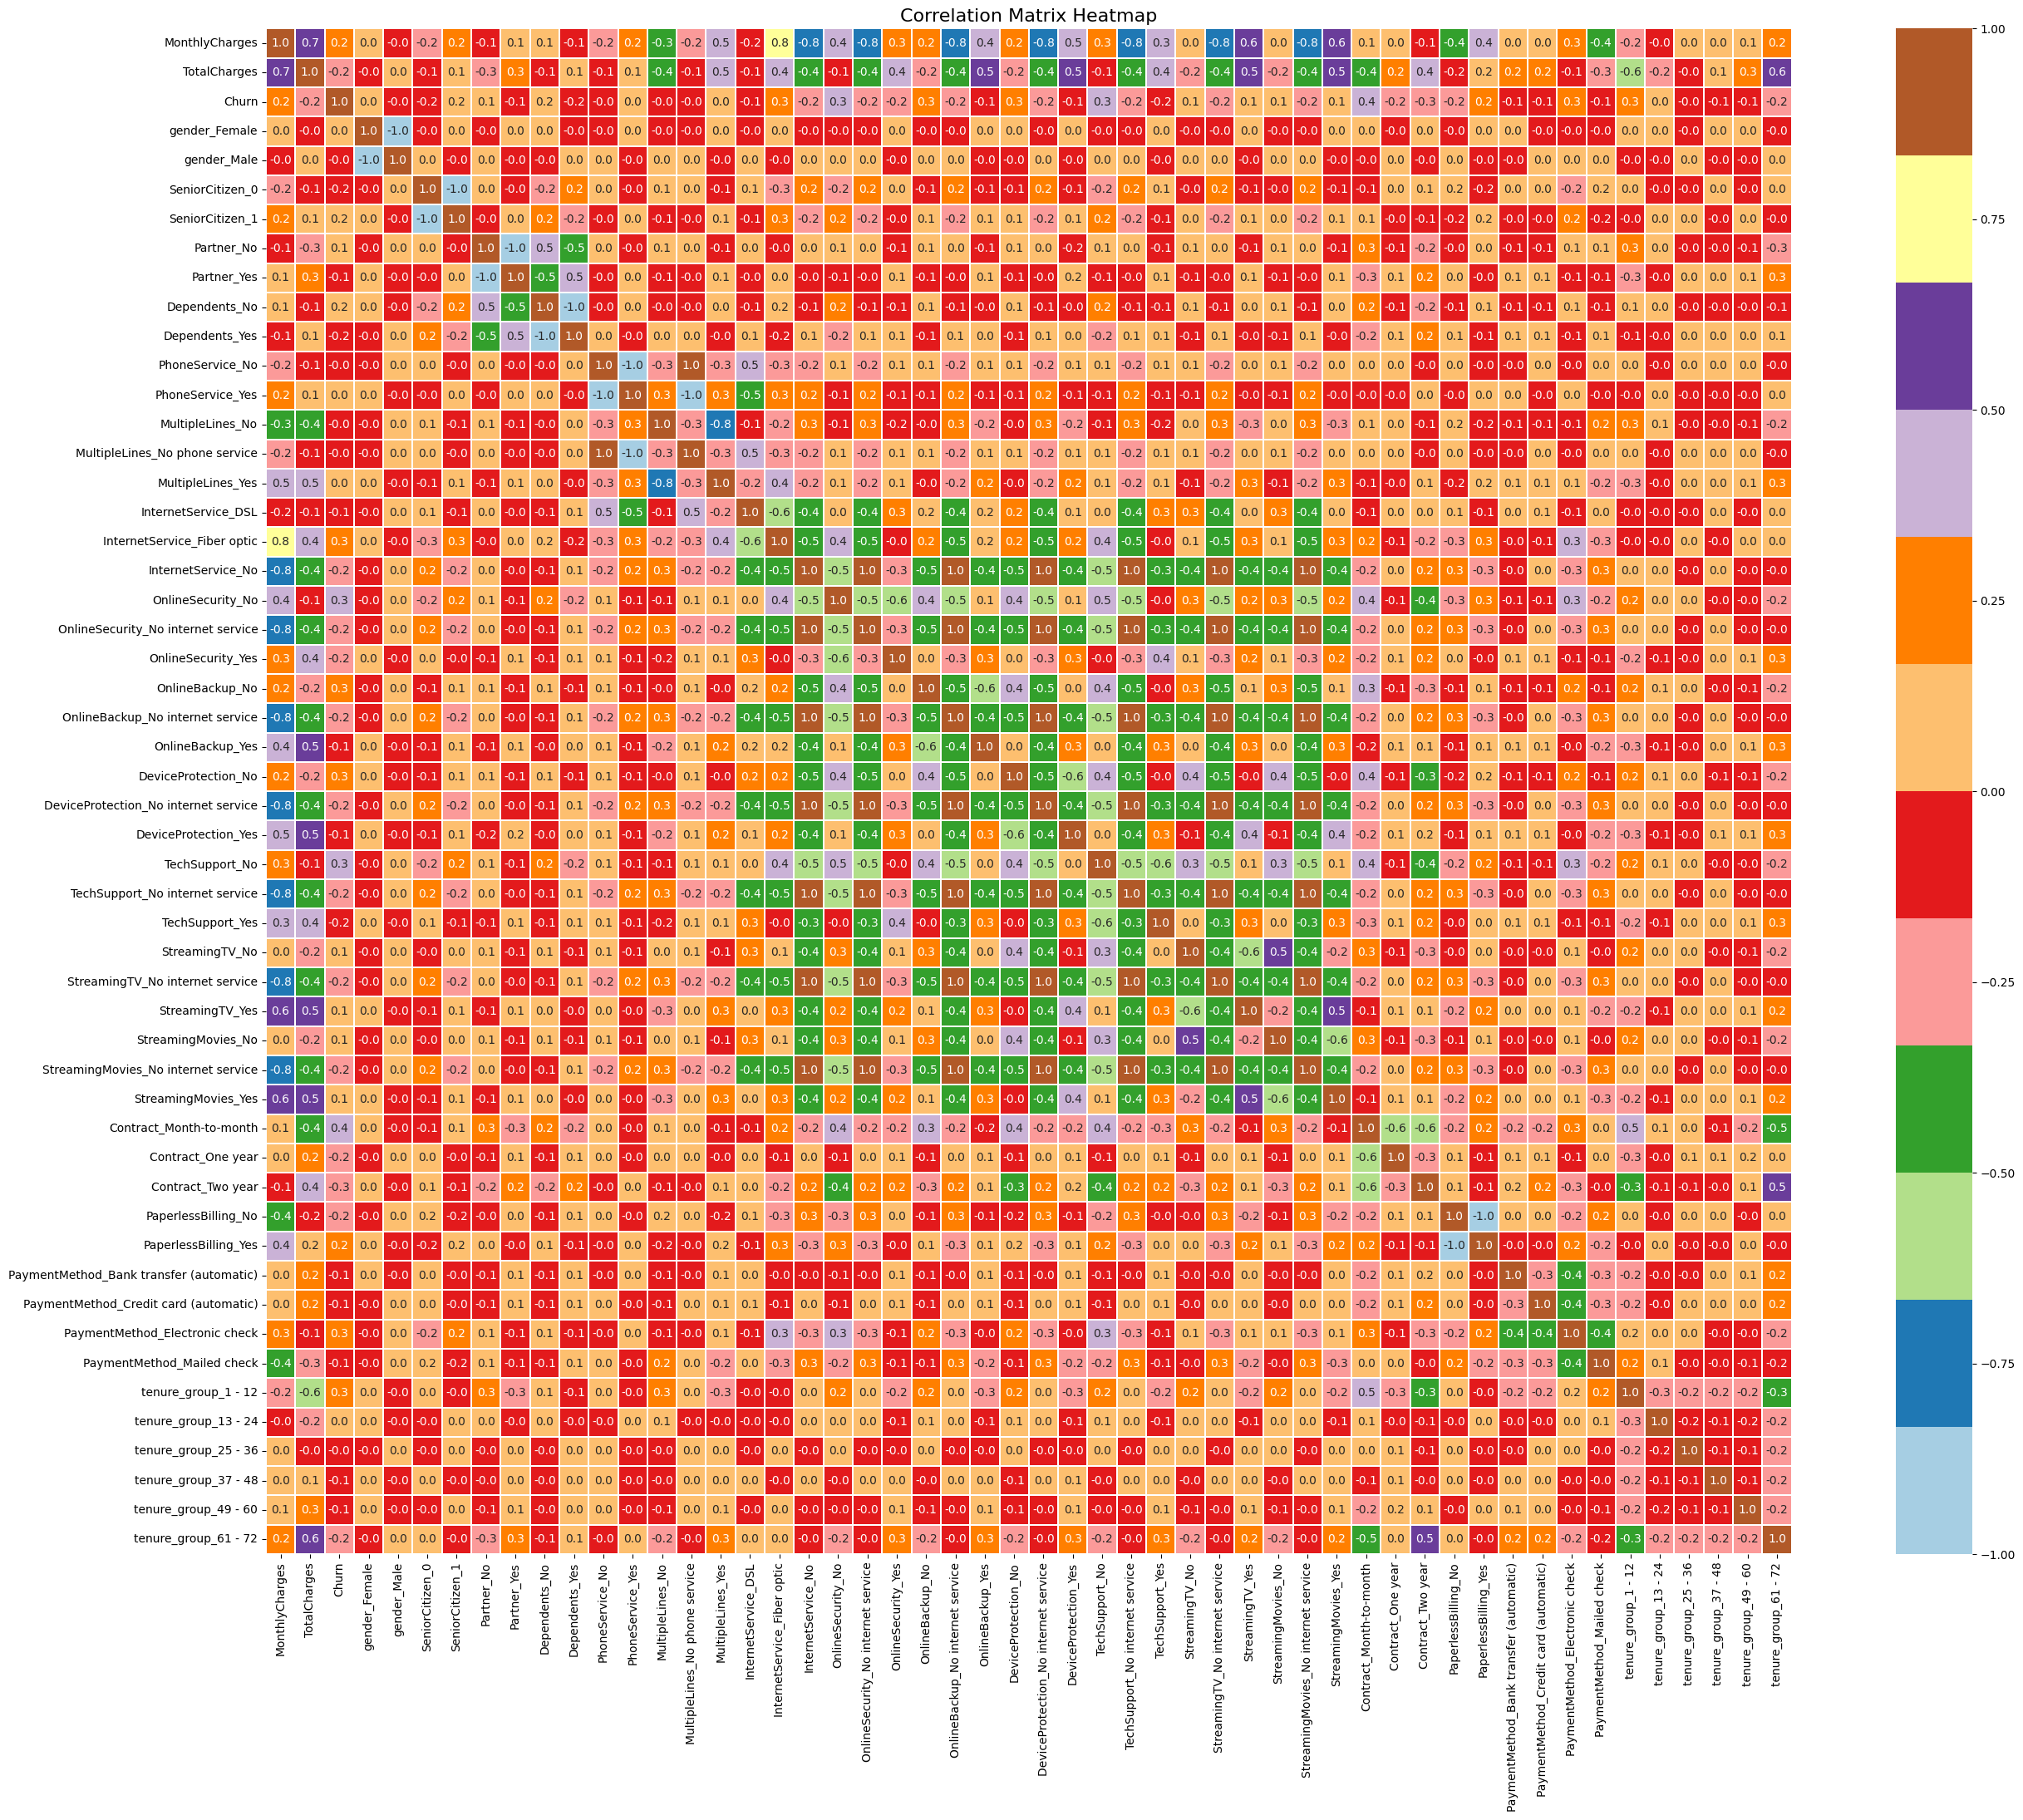

In [31]:
# Create a figure with a large size to ensure readability of the heatmap
plt.figure(figsize=(28, 22))

# Create a heatmap using the correlation matrix from the dataset
sns.heatmap(new_df_dummies.corr(), 
            cmap="Paired",  # Color palette for better visualization of correlations
            annot=True,  # Display correlation values inside each cell
            fmt=".1f",  # Format the correlation values to one decimal place
            linewidths=0.1,  # Add slight separation between cells for clarity
            square=True,  # Make the heatmap square-shaped for symmetry
            # cbar_kws={'shrink': 0.8}  # Optional: Can adjust the color bar size (commented out here)
           )

# Set a title for the heatmap
plt.title("Correlation Matrix Heatmap", fontsize=16)

# Use tight_layout to adjust the spacing between the figure elements
plt.tight_layout()

# Display the heatmap
plt.show()

### Bivariate Analysis

In [32]:
# Create a new DataFrame containing only customers who did not churn (Churn == 0)
new_df_unchurn = new_df.loc[new_df["Churn"] == 0]

# Create a new DataFrame containing only customers who churned (Churn == 1)
new_df_churn = new_df.loc[new_df["Churn"] == 1]

In [33]:
# Display the number of rows and columns separately for the churned customers
rows_churn, cols_churn = new_df_churn.shape
print("Churned customers")
print(f"{rows_churn} rows")
print(f"{cols_churn} columns","\n")

# Display the number of rows and columns separately for the non-churned customers
rows_unchurn, cols_unchurn = new_df_unchurn.shape
print("Non-churned customers")
print(f"{rows_unchurn} rows")
print(f"{cols_unchurn} columns")

Churned customers
1869 rows
20 columns 

Non-churned customers
5163 rows
20 columns


In [34]:
# Define the uniplot function to visualize the distribution of a given column with optional hue
def uniplot(df, col, title, hue=None):
    # Set the style of the plot to 'whitegrid' for a clean background
    sns.set_style('whitegrid')

    # Adjust the default font sizes for axes labels and titles
    plt.rcParams["axes.labelsize"] = 10
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['axes.titlepad'] = 20

    # Convert hue to a pandas Series for handling unique values
    temp = pd.Series(data=hue)

    # Create a plot with custom dimensions, width based on number of unique values in column and hue
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 3 + 2 * len(temp.unique())
    fig.set_size_inches(width, 3)  # Set the width and height of the plot
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Set the title for the plot
    plt.title(title)

    # Create a countplot with the specified column and hue (optional)
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')

    # Annotate the bars with their heights (counts)
    for i in ax.patches:
        height = i.get_height()
        # Set label position: 
        # If height is large, place the label above the bar, otherwise inside the bar
        if height > 10:  # You can adjust this threshold based on your needs
            plt.text(i.get_x() + i.get_width() / 2, height + height * 0.02, f'{height}', ha='center', fontsize=15, color='black')
        else:
            plt.text(i.get_x() + i.get_width() / 2, height / 2, f'{height}', ha='center', fontsize=15, color='black')

    # If hue is provided, adjust the legend placement outside the plot
    if hue:  
        ax.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

    # Display the plot
    plt.show()


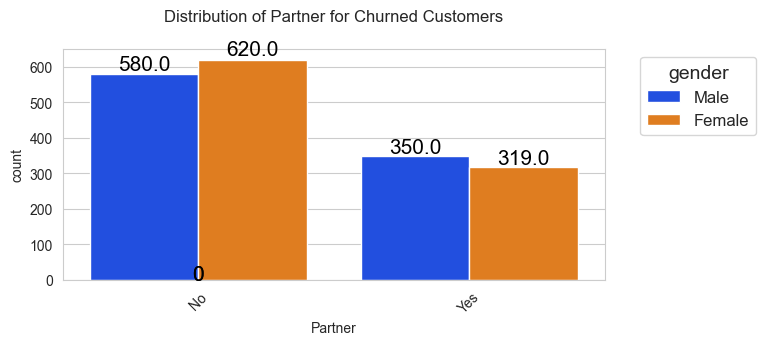

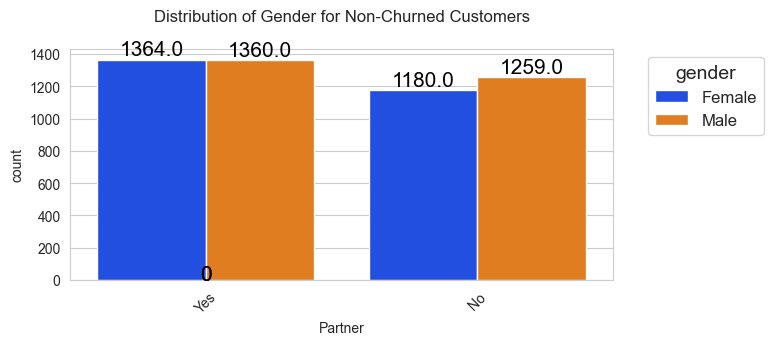

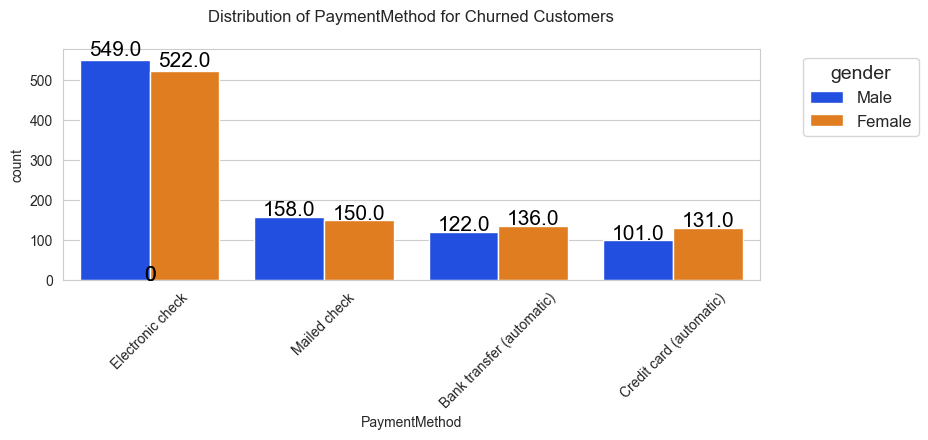

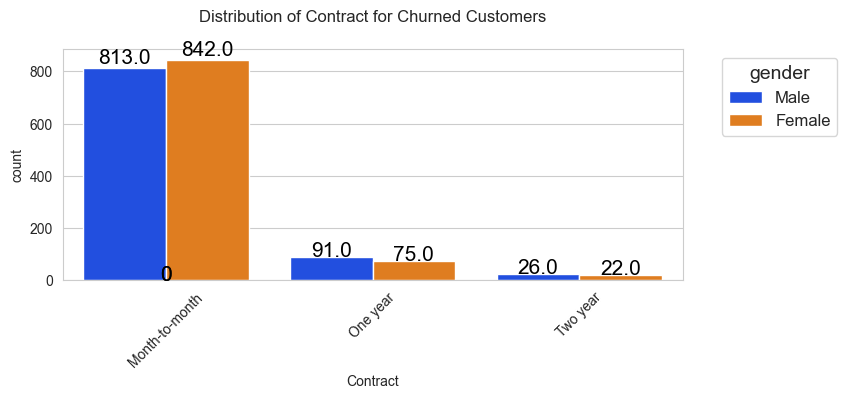

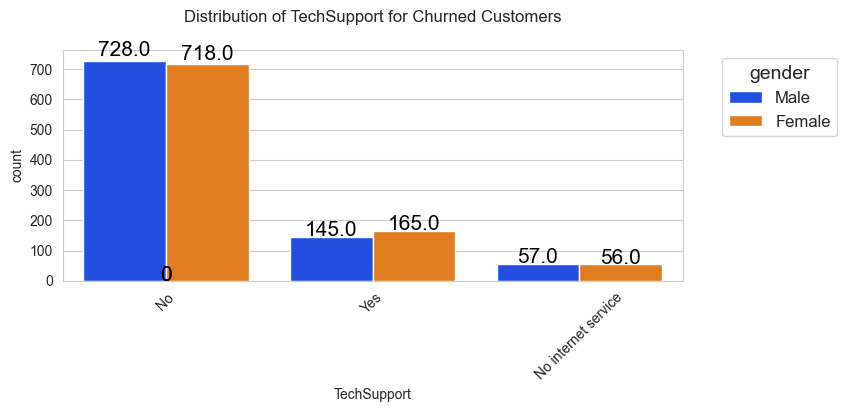

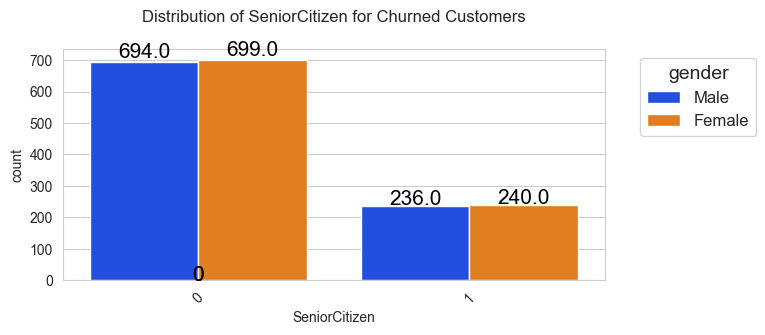

In [35]:
# Call the uniplot function to visualize the distribution of 'Partner' for churned customers with 'gender' as hue
uniplot(new_df_churn, col='Partner', title='Distribution of Partner for Churned Customers', hue='gender')
uniplot(new_df_unchurn,col='Partner',title='Distribution of Gender for Non-Churned Customers',hue='gender')
uniplot(new_df_churn,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')
uniplot(new_df_churn,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')
uniplot(new_df_churn,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')
uniplot(new_df_churn,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')


### Quick Insights from this Exercise:

- **Electronic check** payment medium has the highest churn rate.
- **Contract Type**: Monthly customers are more likely to churn due to the absence of contract terms, as they are free to leave at any time.
- Customers without **Online Security** and **Tech Support** have higher churn rates.
- **Non-Senior Citizens** have a higher churn rate compared to Senior Citizens.
- **Note**: There could be many more such insights. Treat this as an assignment and try to explore and extract additional insights :)

In [36]:
new_df_dummies.to_csv('tel_churn.csv')

## Building Model

In [37]:
 # Displays the first 5 rows of the DataFrame to get a quick overview of the data
new_df_dummies.head()

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,29,29,0,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,56,1889,0,0,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,53,108,1,0,1,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,42,1840,0,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,70,151,1,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [38]:
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split

# # Separate features and target
# X = new_df.drop('Churn', axis=1)
# y = new_df['Churn']  # Already encoded as 1/0

# # Identify categorical and numeric columns
# cat_cols = X.select_dtypes(include='object').columns.tolist()
# num_cols = X.select_dtypes(exclude='object').columns.tolist()

# # Build preprocessing pipeline
# preprocessor = ColumnTransformer(transformers=[
#     ('cat', OneHotEncoder(drop='first'), cat_cols),  # drop='first' to avoid dummy trap
#     ('num', 'passthrough', num_cols)
# ])

# # Combine preprocessing + model in a full pipeline
# clf_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', RandomForestClassifier(random_state=42))
# ])

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit the pipeline
# clf_pipeline.fit(X_train, y_train)

# # Predict on new data
# y_pred = clf_pipeline.predict(X_test)

In [39]:
# Dropping the 'Churn' column to use all other columns as features
x = new_df_dummies.drop(columns = 'Churn',axis = 1)

# Extracting the 'Churn' column as the target variable
y = new_df_dummies['Churn']

In [40]:
# Display the shape of the feature set and target variable
print(x.shape)
print(y.shape)

(7032, 51)
(7032,)


##### Split test and train data

In [41]:
# Splitting the dataset into training and testing sets with a 70-30 split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Decision Tree Classifier

In [42]:
# Initializing a DecisionTreeClassifier model
model_dt = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=6, min_samples_leaf=8)

# - criterion="gini": The Gini impurity measure is used to split nodes.
# - random_state=42: Ensures reproducibility of results.
# - max_depth=6: Limits the depth of the tree to prevent overfitting.
# - min_samples_leaf=8: Ensures each leaf node has at least 8 samples to avoid overfitting.

In [43]:
# Fitting the DecisionTreeClassifier model to the training data
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=42)

In [44]:
# Making predictions using the trained DecisionTreeClassifier model on the test data (x_test)
y_pred = model_dt.predict(x_test)
print(f"Total Rows: {y_pred.shape[0]}")
print(y_pred)

Total Rows: 1407
[0 0 0 ... 0 0 0]


In [45]:
# Evaluate model accuracy on the test set
print(f"Accuracy: {(model_dt.score(x_test, y_test))*100 :.2f} %")

Accuracy: 78.82 %


In [46]:
def pretty_classification_report(y_true, y_pred, labels=None):
    report = classification_report(y_true, y_pred, labels=labels)
    print("-" * 60)
    print(report)
    print("-" * 60)

# Display precision, recall, f1-score, and support for each class (0: No Churn, 1: Churn)
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1033
           1       0.61      0.55      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



### Model Evaluation Insight

As you can see, the **accuracy** is relatively low. Since this is an **imbalanced dataset**, we shouldn't rely on accuracy as a performance metric. Accuracy can be misleading in such cases — it's often considered **"cursed"** when class distributions are skewed.

#### What should we focus on instead?
We need to evaluate the model using:
- **Precision**
- **Recall**
- **F1-score**

Especially for the **minority class (Class 1: Churned customers)**.

#### Observation:
- Precision, recall, and F1-score for churned customers are significantly low.
- This indicates the model is not effectively capturing the patterns related to customer churn.

---

### Next Step: Apply SMOTEENN
We'll now move ahead to apply **SMOTEENN**, a technique that combines:
- **SMOTE (Synthetic Minority Oversampling Technique)** to balance the minority class, and
- **ENN (Edited Nearest Neighbors)** to clean noisy samples

This should help improve model performance on the minority class.


In [47]:
# Apply SMOTEENN to balance the dataset by oversampling the minority class and cleaning noisy samples
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)

In [48]:
# Split the resampled data into training and testing sets (80/20 split)
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [49]:
# Initialize Decision Tree with specified hyperparameters on SMOTEENN data
model_dt_smote = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)

In [50]:
# Train the Decision Tree model on the resampled training data
model_dt_smote.fit(xr_train, yr_train)

# Predict on the test set
yr_predict = model_dt_smote.predict(xr_test)

# Get accuracy score on resampled test data
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(f"Model Score: {model_score_r:.2%}")

# Display classification report for precision, recall, f1-score
print(metrics.classification_report(yr_test, yr_predict))

Model Score: 94.47%
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       505
           1       0.94      0.97      0.95       671

    accuracy                           0.94      1176
   macro avg       0.95      0.94      0.94      1176
weighted avg       0.94      0.94      0.94      1176



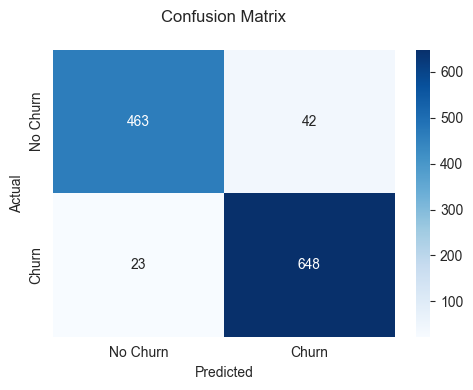

confusion_matrix:  
 [[463  42]
 [ 23 648]]


In [51]:
# Get the confusion matrix
cm = confusion_matrix(yr_test, yr_predict)

# Plot it using seaborn
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Display the confusion matrix for the resampled test set
print("confusion_matrix: ","\n",metrics.confusion_matrix(yr_test, yr_predict))

### Random Forest Classifier

In [52]:
# Initialize a Random Forest classifier with 100 trees, Gini index for splitting, and specific hyperparameters
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [53]:
# Fit the Random Forest model to the training data
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [54]:
# Predict the target labels using the trained Random Forest model on the test data
y_pred = model_rf.predict(x_test)

In [55]:
# Evaluate the accuracy of the Random Forest model on the test data
print(f"Random forest Model Score: {model_rf.score(x_test, y_test):.2%}")

Random forest Model Score: 80.74%


In [56]:
# Generate and display the classification report for the Random Forest model's predictions
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1033
           1       0.71      0.47      0.56       374

    accuracy                           0.81      1407
   macro avg       0.77      0.70      0.72      1407
weighted avg       0.80      0.81      0.79      1407



In [57]:
# Apply SMOTEENN (Synthetic Minority Over-sampling Technique + Edited Nearest Neighbors) to balance the dataset by generating synthetic samples and removing noise
X_resampled1, y_resampled1 = sm.fit_resample(x, y)

In [58]:
# Split the resampled dataset with 80% for training and 20% for testing
xr_train1, xr_test1, yr_train1, yr_test1 = train_test_split(X_resampled1, y_resampled1, test_size=0.2)

In [59]:
# Initialize a RandomForestClassifier model with specified parameters
model_rf_smote = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

# - 100 trees (n_estimators=100)
# - Gini impurity for splitting (criterion='gini')
# - Random state set to 100 for reproducibility
# - Maximum depth of the trees set to 6 (max_depth=6)
# - Minimum samples per leaf set to 8 (min_samples_leaf=8)

In [60]:
# Fit the Random Forest model on the resampled training data
model_rf_smote.fit(xr_train1, yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [61]:
# Predict the target variable using the trained Random Forest model
yr_predict1 = model_rf_smote.predict(xr_test1)

In [62]:
# Evaluate the model's performance by calculating the accuracy on the resampled test set
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)
print(f"Random Forest Model Score: {model_score_r1:.2%}") # Print the model's accuracy score on the resampled test set

Random Forest Model Score: 93.35%


In [63]:
# Print the classification report to evaluate precision, recall, f1-score, etc., for each class
print(metrics.classification_report(yr_test1, yr_predict1))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       537
           1       0.93      0.95      0.94       621

    accuracy                           0.93      1158
   macro avg       0.93      0.93      0.93      1158
weighted avg       0.93      0.93      0.93      1158



In [64]:
# Print the confusion matrix to evaluate the performance of the model on the resampled test set
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[489  48]
 [ 29 592]]


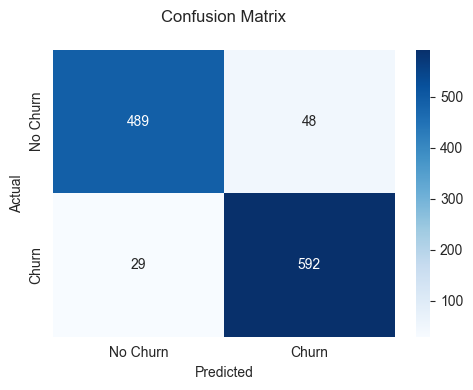

confusion_matrix:  
 [[489  48]
 [ 29 592]]


In [65]:
# Get the confusion matrix
cm1 = confusion_matrix(yr_test1, yr_predict1)

# Plot it using seaborn
plt.figure(figsize=(5,4))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Display the confusion matrix for the resampled test set
print("confusion_matrix: ","\n",metrics.confusion_matrix(yr_test1, yr_predict1))

### Save the model

In [66]:
# Save the trained Random Forest model with SMOTEENN applied to a file using pickle
filename = 'churn.model'
pickle.dump(model_rf_smote, open(filename, 'wb'))

##### Open loaded Model to check 

In [67]:
# Load the previously saved Random Forest model from the file
load_model = pickle.load(open(filename, 'rb'))

In [68]:
# Evaluate the loaded model's performance on the test data
print(f"Model Score: {load_model.score(xr_test1, yr_test1):.2%}")

Model Score: 93.35%


**Our final model, i.e., the RF Classifier with SMOTEENN, is now ready and saved in the file `churn.model`. We will use this model to prepare APIs, enabling us to access it from the UI.**

#### Pickling the model

In [69]:
import pickle
filename = 'model.sav' # Define the filename for saving the model
pickle.dump(model_rf_smote, open(filename, 'wb')) # Save the trained model to a file
load_model = pickle.load(open(filename, 'rb')) # Load the saved model from the file 
model_score_r1 = load_model.score(xr_test1, yr_test1) # Evaluate the loaded model's performance on the test data
print(f"Model Score: {model_score_r1:.2%}") # Print the model's accuracy score on the test data 

Model Score: 93.35%


In [70]:
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# import joblib

# # Assuming you already trained your model/pipeline
# pipe = Pipeline([
#     ('clf', RandomForestClassifier())
# ])

# pipe.fit(xr_train1, yr_train1)

# # Save it
# joblib.dump(pipe, 'model.sav')  # or use any path you like
# print("✅ Model saved successfully!")\

In [71]:
# import joblib
# model = joblib.load('model.sav')
# print(type(model))  # It should be <class 'sklearn.ensemble.RandomForestClassifier'>
